# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 檢視每個欄位是否包含NA值
a = app_train.isna().sum()
# 只顯示含NA值的變數
a[a!=0]

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

In [4]:
# 若欄位中有NA值，會無法計算對應的分位數
np.percentile(app_train.AMT_ANNUITY,q = [0,25,50,75,100])

C:\Users\TL_Yu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


array([nan, nan, nan, nan, nan])

In [5]:
# 剔除AMT_ANNUITY欄位中含NA值的資料，再計算q0, 25,50,75,100等分位數
app_train2 = app_train.loc[~app_train['AMT_ANNUITY'].isnull()].copy()
np.percentile(app_train2['AMT_ANNUITY'], q = [0,25,50,75,100])

array([  1615.5,  16524. ,  24903. ,  34596. , 258025.5])

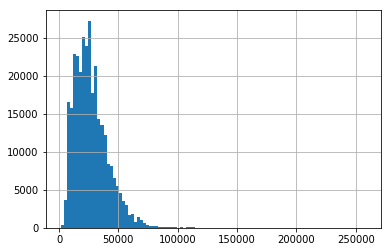

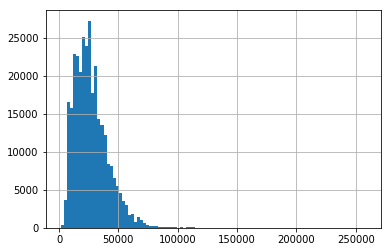

In [6]:
app_train['AMT_ANNUITY'].hist(bins=100)
plt.show()
app_train2['AMT_ANNUITY'].hist(bins=100)
plt.show()

In [7]:
# 試著將 max 取代為 q99
AMT_ANNUITY_q99 = np.percentile(app_train2['AMT_ANNUITY'], q = 99)
app_train2['AMT_ANNUITY'].max()

258025.5

In [8]:
app_train2.loc[app_train2['AMT_ANNUITY'] == app_train2['AMT_ANNUITY'].max(), "AMT_ANNUITY"] = AMT_ANNUITY_q99
app_train2['AMT_ANNUITY'].max()

230161.5

# 嘗試不同的標準化、常態化方法
- Z分數
- 全距(0~1)
- 全距(-1~1)

In [9]:
value = app_train2['AMT_ANNUITY']
# Z分數
app_train2['AMT_ANNUITY_Z'] = (value - np.mean(value)) / (np.std(value))
# 全距0~1
app_train2['AMT_ANNUITY_01'] = (value - np.min(value)) / (np.max(value)-np.min(value))
# 全距-1~1
app_train2['AMT_ANNUITY_02'] = (((value - np.min(value)) / (np.max(value)-np.min(value)))-0.5) * 2
app_train2.loc[:, ['AMT_ANNUITY','AMT_ANNUITY_Z','AMT_ANNUITY_01','AMT_ANNUITY_02']].describe()

,AMT_ANNUITY,AMT_ANNUITY_Z,AMT_ANNUITY_01,AMT_ANNUITY_02
count,307499.000000,3.074990e+05,307499.000000,307499.000000
mean,27107.962463,3.052535e-16,0.111542,-0.776916
std,14487.960432,1.000002e+00,0.063392,0.126784
min,1615.500000,-1.759565e+00,0.000000,-1.000000
25%,16524.000000,-7.305362e-01,0.065232,-0.869536
50%,24903.000000,-1.521930e-01,0.101894,-0.796212
75%,34596.000000,5.168464e-01,0.144306,-0.711389
max,230161.500000,1.401535e+01,1.000000,1.000000


# HW
- 列出 AMT_ANNUITY 的 q0 - q100
- 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
- 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
- 將 AMT_GOOD_PRICE 的 NAs 以眾數填補

In [10]:
# 列出 AMT_ANNUITY 的 q0 - q100
q_app = pd.DataFrame({'index': list(range(0,101)),
                      'value': np.percentile(app_train2['AMT_ANNUITY'], q = list(range(0,101)))})
q_app.head()

,index,value
0,0,1615.50
1,1,6182.91
2,2,6750.00
3,3,7875.00
4,4,8703.00


In [11]:
# 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補(q50)
median = q_app.loc[q_app['index'] == 50, ['value']]
app_train2.loc[app_train2["AMT_ANNUITY"].isna(),"AMT_ANNUITY"] = float(median.value)

### Hints: Normalize function (to -1 ~ 1)
$ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

In [12]:
# 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
values = app_train2['AMT_ANNUITY'].values
app_train2["AMT_ANNUITY2"] = (((values - min(values)) / (max(values) - min(values)))-0.5) * 2

In [13]:
# 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補
from statistics import mode
mode = mode(app_train.AMT_GOODS_PRICE)
app_train.loc[app_train.AMT_GOODS_PRICE.isnull(),"AMT_GOODS_PRICE"] = mode